# **IMPORT NECESSARY MODELS**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

#**LOAD MNIST DATASET**

In [ ]:
#loading the data into train and test set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **DATA PREPROCESSING**

- Reshaping data

In [ ]:
# Reshaping data
num_pixels = 784
train_images_flat = train_images.reshape(train_images.shape[0], num_pixels)
test_images_flat = test_images.reshape(test_images.shape[0], num_pixels)

# The following code forms a matrix for each digit 'i' whose columns are images of that digit.

In [ ]:
# Define a dictionary to store digit image matrices
digit_images = {}

# Loop through each digit class (0-9)
for digit in range(10):
  # Select all images belonging to the current digit
  digit_images[digit] = train_images_flat[train_labels == digit][:4000, :]
for digit in range(10):
  digit_images[digit] = digit_images[digit].T
# Each value in `digit_images` will be a matrix with dimensions (784, 4000)
# where 4000 represents all images of that digit in the training set.

# Extract the top n left singular vectors from a matrix.

In [ ]:
def get_top_singular_vectors(matrix, num_components=4):
  """
  Extracts the top `num_components` left singular vectors from a matrix.

  Args:
      matrix: The input matrix.
      num_components: The number of singular vectors to extract (default: 4).

  Returns:
      A NumPy array containing the top `num_components` left singular vectors.
  """
  u, s, vh = np.linalg.svd(matrix, full_matrices=False)
  return u[:, :num_components]

# Extract top 4 principal components for each digit matrix.

In [ ]:
# Extract top 4 principal components for each digit matrix
digit_components = {}
for digit, matrix in digit_images.items():
  components = get_top_singular_vectors(matrix)
  digit_components[digit] = components

# Visualization of images obtained using left singular vectors

- The following function prints 50 images, 5 for each of the labels ----- one original image and
4 images corresponding to the left singular vectors.

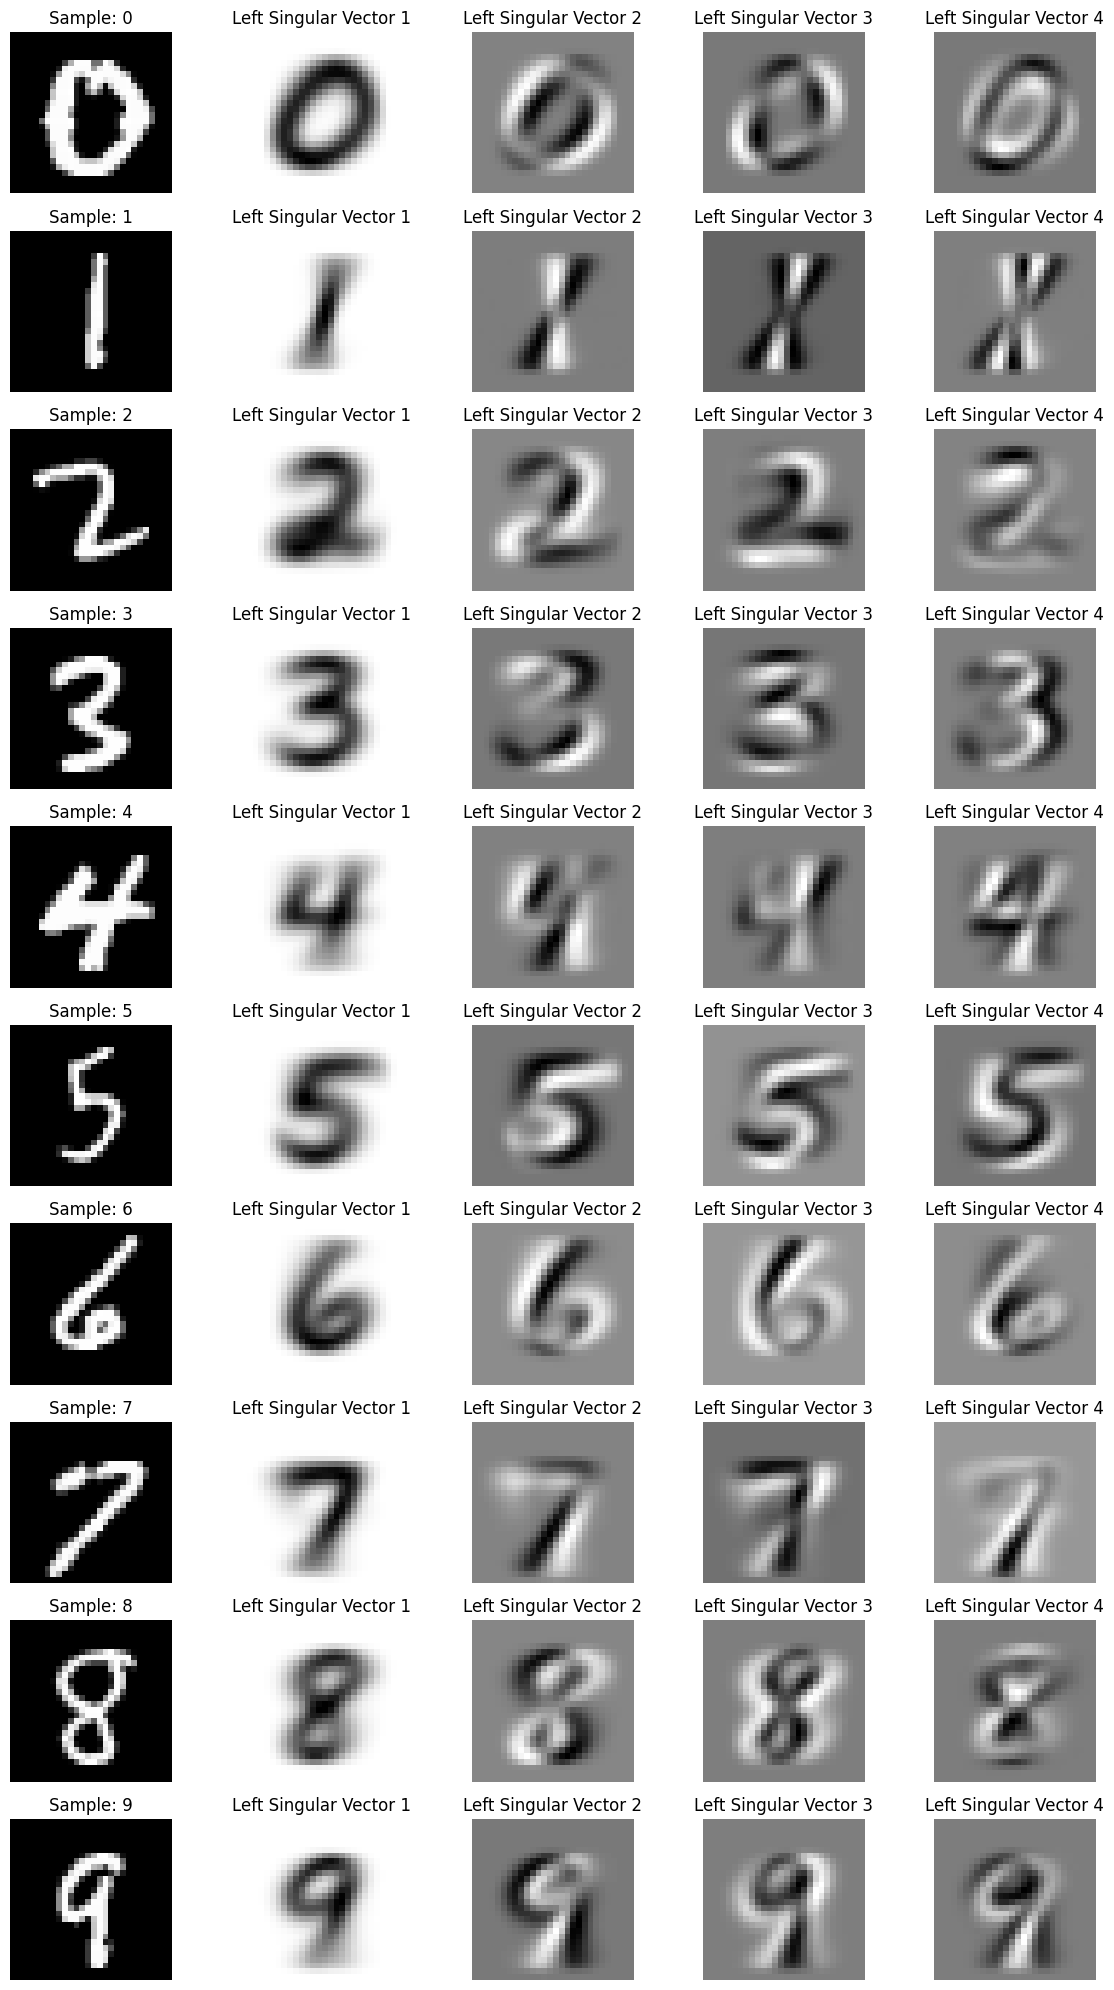

In [ ]:
fig, axes = plt.subplots(10, 5, figsize=(12, 20))

for digit in range(10):
    #sample_image = train_images[np.where(train_labels == digit)[0][0]]
     # Choose a random training image for this digit
    random_idx = np.random.randint(4000)
    sample_image = digit_images[digit][:, random_idx].reshape(28, 28)
    axes[digit, 0].imshow(sample_image, cmap='gray')
    axes[digit, 0].set_title(f"Sample: {digit}")
    axes[digit, 0].axis('off')
    left_singular_vectors = digit_components[digit]
    for i in range(4):
        singular_vector_image = left_singular_vectors[:, i].reshape(28, 28)
        axes[digit, i + 1].imshow(singular_vector_image, cmap='gray')
        axes[digit, i + 1].set_title(f"Left Singular Vector {i+1}")
        axes[digit, i + 1].axis('off')
plt.tight_layout()
plt.show()

# Predict the label for an image

In [ ]:
# Classification function
def classify(image):
  """the classification function predict the label for an image passed to the function
   on the basis of the norm mentioned in the function"""
  min_distance = float('inf')
  predicted_digit = -1
  for i, U in digit_projections.items():
    distance = np.linalg.norm(image - U @ U.T @ image)
    if distance < min_distance:
      min_distance = distance
      predicted_digit = i
  return predicted_digit

# **TRAINING, TESTING AND CONFUSION MATRIX**

In the following code, we perform SVD on the dataset, obtain the confusion matrix and the accuracy score

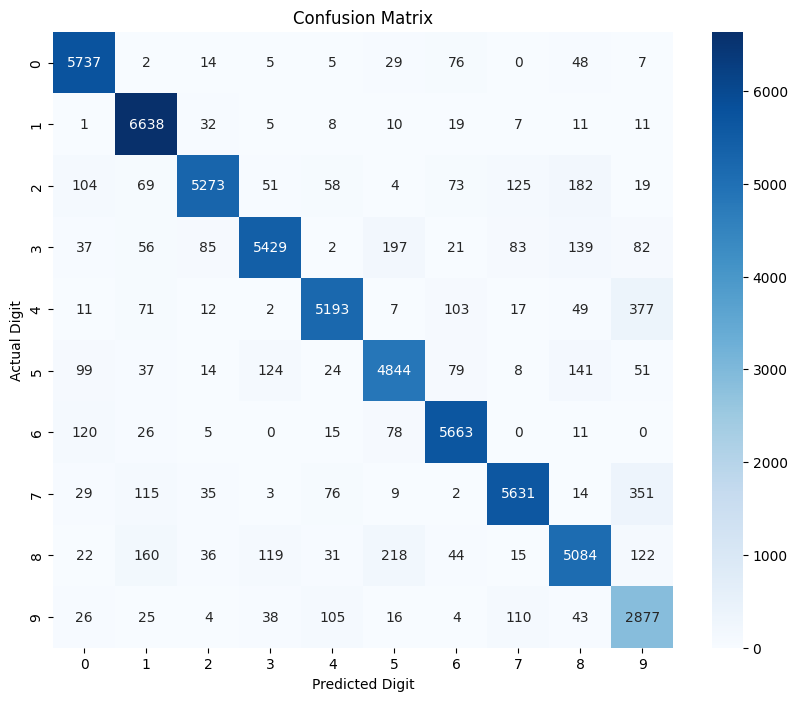

Accuracy: 91.40%


In [ ]:
# using between 2500 − −3000 images of each digit in the training set to form the matrices and use the remaining as (labeled) test images

train_images = train_images.reshape(-1, 28 * 28).astype('float32') / 255
test_images = test_images.reshape(-1, 28 * 28).astype('float32') / 255
np.random.seed(0)
n_images_per_digit = random.randint(2500, 3000)
digit_projections = {}
for digit in range(10):
    indices = np.where(train_labels == digit)[0]
    selected_indices = np.random.choice(indices, size=n_images_per_digit, replace=False)
    images = train_images[selected_indices]
    svd = TruncatedSVD(n_components=4)
    svd.fit(images)
    U = svd.components_.T
    digit_projections[digit] = U
remaining_indices = np.setdiff1d(np.arange(len(train_images)), selected_indices)
remaining_test_images = train_images[remaining_indices]
remaining_test_labels = train_labels[remaining_indices]
predicted_labels = []
for i in range(len(remaining_test_images)):
    test_image = remaining_test_images[i]
    predicted_label = classify(test_image)
    predicted_labels.append(predicted_label)
confusion = confusion_matrix(remaining_test_labels, predicted_labels)
accuracy = accuracy_score(remaining_test_labels, predicted_labels) * 100
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.show()
print(f"Accuracy: {accuracy:.2f}%")


# REPORT

For **classification**, I adopted a model based on low-rank approximations of the SVD factorization. Instead of using the full matrix representation of each digit, I utilized a reduced-rank approximation by considering only the first four columns of the left singular vectors. The classification of a test image z was performed by computing the minimum norm ρ_n(z) for each digit n between 0 to 9, where the label of z is determined by the digit with the least norm.

The norm here is defined as ρ_n(z) = min||D(n)x-z||

The function calculates the projection of the test image ono the left singular vectors (U.T @ image) and then reconstruct the test image using this projection (U @ U.T @ image). It then calculates the difference between the original test image and the reconstructed image for each digit.

The function classify finds the digit which minimizes the norm and returns the corresponding digit as the predicted label for the image.

**Justification--**

By using the minimum the left singular vectors of each digit matrix the function reduces the dimentionality of the problem , thus making the classification process more effective.

The norm used for classification serves as a measure of similarity. A lower norm indicates a closer match between the test image and the digit's subspace, indicating a better match.

Using the left singular vectors of each digit matrix helps capture the most significant features of the images, making the classification more robust to variations in the test images.

**Conclusion--**
We obtain an accuracy score of 91.40% by performing this experiment on MNIST dataset.